## Making a FigureFirst layout SVG file from a Matplotlib figure object

Though it goes against the premise of FigureFirst, we recognize that sometimes it is easier to create certain figure layouts programmatically using Matplotlib. Or perhaps you already have the code to generate a complex figure, and you are hesitant to use FigureFirst because you don't want to redo that layout in SVG.

To help with this workflow direction we provide some tools to convert Matplotlib figures into FigureFirst compatible SVG layout files. 

First we import matplotlib.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Now we make a relatively complex matplotlib figure using subplot functions.

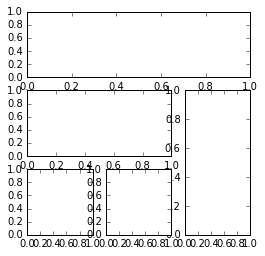

In [4]:
fig = plt.figure(figsize=(4,4))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))

Now import figurefirst, and with a single function call we generate an svg file ('test_mpl_conversion.svg'), which is saved to disk, and automatically loaded as a FigureFirst layout object, ready to go. 

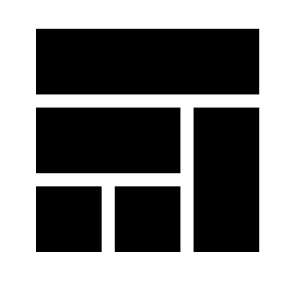

In [5]:
import figurefirst as fifi
reload(fifi.mpl_fig_to_figurefirst_svg)
layout = fifi.mpl_fig_to_figurefirst_svg.mpl_fig_to_figurefirst_svg(fig, 'test_mpl_conversion.svg')

# Now lets look at the SVG file (and close the automatically displayed matplotlib figure)
plt.close()
from IPython.display import display,SVG
display(SVG('test_mpl_conversion.svg'))

You can now open the svg file in an svg editor, like inkscape, make adjustments to the rectangles, and reload the file using the standard FigureFirst API. 

Try it, and see the resulting changes below.

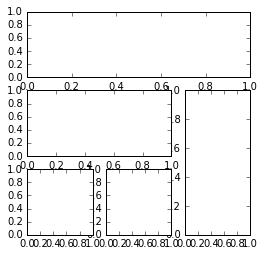

In [6]:
layout = fifi.svg_to_axes.FigureLayout('test_mpl_conversion.svg', make_mplfigures=True)

## Using Matplotlib and FigureFirst layouts together

Suppose you would like to make a figure with 3 panels, where each panel contains a grid of axes that are easier to generate using Matplotlib functions than they are to draw. Or maybe you want the layout of these axes to be controlled based on the data. This can be accomplished by bringing together the functions described above, and the primary FigureFirst workflow.

First we generate a new Matplotlib figure, as before.

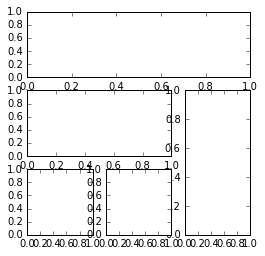

In [14]:
fig = plt.figure(figsize=(4,4))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))

Now let's use the above arrangement of axes as a template for the figurefirst:figure objects that we have drawn in an svg file. Below is a rendering of the svg file showing where we would like the templated sets of axes to go. 

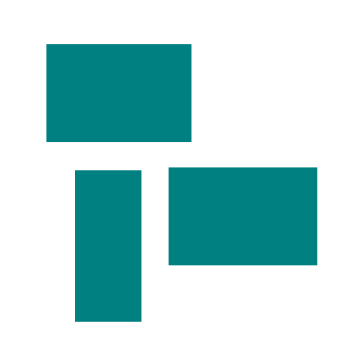

In [15]:
display(SVG('mpl_fig_for_templates.svg'))

Now we call `add_mpl_fig_to_figurefirst_svg` with the necessary arguments to add a layer to the above svg file. This new layer is similar to the layer created previously using `mpl_fig_to_figurefirst_svg`, except that instead of placing this layer into an empty svg, we are adding it to an existing svg.

The one trick being used here is that the svg file `mpl_fig_for_templates.svg` has figurefirst:figure labels that point to a non-existent template. You can inspect the svg file in Inkscape's svg editor to find that each rectangle has a `figurefirst:figure` tag with a `figurefirst:template` attribute that points to an `mpl_template`. By setting the figurefirst_figure_name to `mpl_template` we can insert the template that those `figurefirst:figure` tags are looking for. 

<em>You can ignore the Warning that appears - this is printed out the first time the layout is loaded and it can't find the templates. </em>

In [17]:
fifi_svg_filename = 'mpl_fig_for_templates.svg'
mpl_fig = fig
output_filename = 'mpl_fig_for_templates_output.svg'

layout = fifi.mpl_fig_to_figurefirst_svg.add_mpl_fig_to_figurefirst_svg(   fifi_svg_filename, 
                                                                           mpl_fig, 
                                                                           output_filename, 
                                                                           design_layer_name='mpl_design_layer', 
                                                                           figurefirst_figure_name='mpl_template')
plt.close('all')


Now we can load the layout that has the added layer generated from the Matplotlib figure, and make a sample plot. 

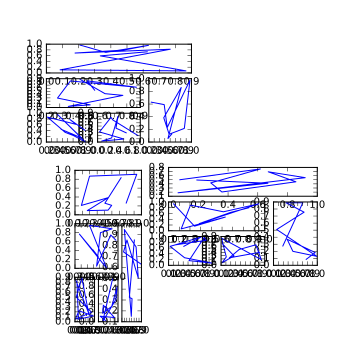

In [18]:
layout = fifi.svg_to_axes.FigureLayout('mpl_fig_for_templates_output.svg', make_mplfigures=True)

# collect the group and axis names
#     Note: you could also do this by noting your figurefirst:figure names from the layout file
import numpy as np
groups_and_axes = np.unique(np.ravel(layout.axes.keys()))
groups = [g for g in groups_and_axes if 'group' in g]
axes = [g for g in groups_and_axes if 'ax' in g]

# plot some random data
for group in groups:
    for axis in axes:
        ax = layout.axes[(group, axis)]
        ax.plot(np.random.random(10), np.random.random(10))

    # add the figure (group) to the layout as a new layer
    layout.append_figure_to_layer(layout.figures[group], group, 
                                  cleartarget=True,    
                                  save_traceback=True)  

## Hide the design layers and save the new svg file ##########################
layout.set_layer_visibility(inkscape_label = 'template_layout',vis = False)
layout.set_layer_visibility(inkscape_label = 'mpl_design_layer',vis = False)
layout.write_svg('mpl_fig_for_templates_output_with_plots.svg')

plt.close('all')
display(SVG('mpl_fig_for_templates_output_with_plots.svg'))

Now you can open the `mpl_fig_for_templates_output.svg` file and move the teal colored rectangles around, resize them, save, and re-run the cell above. See how the output responds!